In [9]:
import json
import random
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
from datasets import load_from_disk, load_dataset

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
datasets = load_dataset('squad_kor_v1')

Reusing dataset squad_kor_v1 (/opt/ml/.cache/huggingface/datasets/squad_kor_v1/squad_kor_v1/1.0.0/18d4f44736b8ee85671f63cb84965bfb583fa0a4ff2df3c2e10eee9693796725)
100%|██████████| 2/2 [00:00<00:00, 585.59it/s]


In [5]:
train_contexts = datasets['train']['context']
valid_contexts = datasets['validation']['context']

In [6]:
print(len(train_contexts), len(valid_contexts))

60407 5774


In [7]:
train_len = []
for doc in train_contexts:
    train_len.append(len(doc))

val_len = []
for doc in valid_contexts:
    val_len.append(len(doc))

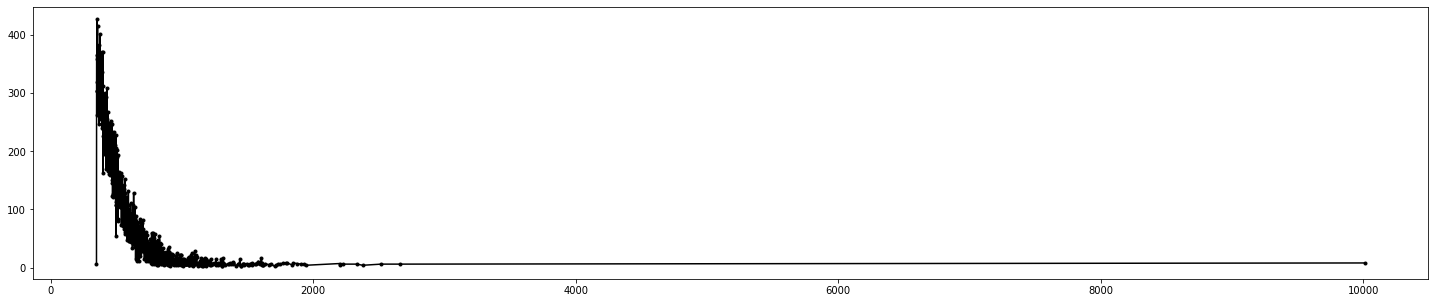

In [10]:
from collections import Counter

count_len = Counter(train_len)
count_len = sorted(count_len.items())
x = [x[0] for x in count_len]
y = [x[1] for x in count_len]

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(x, y,
        color='black',
        marker='.',
        linestyle='solid', 
       )

plt.show()

In [12]:
print('평균 document 길이:', np.mean(train_len))
print('가장 긴 document 길이:', np.max(train_len))
print('가장 짧은 document 길이:', np.min(train_len))

평균 document 길이: 519.2681808399689
가장 긴 document 길이: 10012
가장 짧은 document 길이: 348


In [13]:
train_answers = datasets['train']['answers']

In [14]:
train_answers_idx = []
train_answers_text = []
for i in train_answers:
    train_answers_idx.append(i['answer_start'][0])
    train_answers_text.append(i['text'][0])

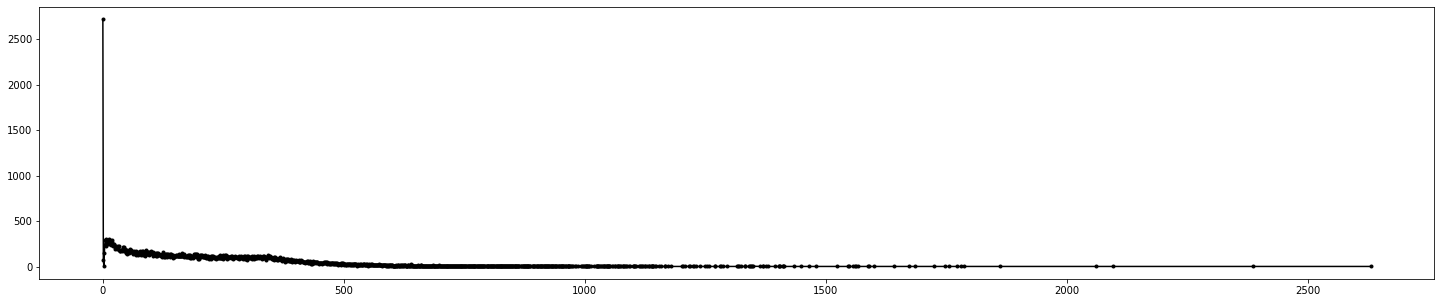

In [15]:
from collections import Counter

count_len = Counter(train_answers_idx)
count_len = sorted(count_len.items())
x = [x[0] for x in count_len]
y = [x[1] for x in count_len]

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(x, y,
        color='black',
        marker='.',
        linestyle='solid', 
       )

plt.show()

In [18]:
train_answer_idx_percent = []
for i in range(len(train_answers)):
    train_answer_idx_percent.append(train_answers_idx[i]/train_len[i])
train_answer_idx_percent[:10]

[0.08023774145616643,
 0.62555720653789,
 0.28826151560178304,
 0.022288261515601784,
 0.5260029717682021,
 0.0,
 0.6092124814264487,
 0.7934621099554234,
 0.7976190476190477,
 0.04563492063492063]

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

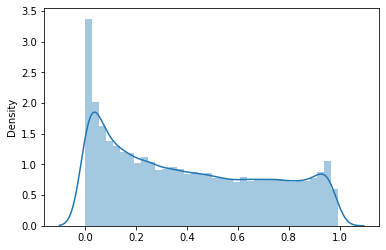

In [20]:
sns.distplot(train_answer_idx_percent)